In [1]:
import numpy as np
import pandas as pd
import pickle


# dfbooks = pd.read_pickle("data.pkl")

import torch


In [46]:


# !pip install contractions
import contractions

In [73]:
# dfbooks['review_body'] = dfbooks['review_body'].str.replace('\d+', '') #Replace all occurring digits in the strings with nothing

# dfbooks['review_body']=dfbooks['review_body'].apply(str)

dfbooks

,product_id,product_parent,product_title,review_body,star_rating,review_date,discipline
5,0262181533,598678717,psychology proof deductive reasoning human thi...,Review based on a cursory examination by Unive...,4,2005-10-14,psychology
46,1594200459,697870179,end poverty economic possibilities time,ALthough he is correct that the IMF and World ...,3,2005-10-14,economy
86,0742538168,339619920,attack messenger politicians turn media americ...,While I don't always agree with his TV analysi...,2,2005-10-14,politics
138,0262612089,733918058,coming generational storm need know americas e...,Since the 1992 presidential run of H. Ross Per...,4,2005-10-14,economy
205,0521832357,82232603,c design patterns derivatives pricing mathemat...,In terms of programming concepts and OOP desig...,5,2005-10-14,economy
...,...,...,...,...,...,...,...
3104923,0679448594,218513537,primary colors novel politics,This book captures the reality of the American...,5,1996-05-19,politics
3105019,0345340280,426467516,living past lives psychology past life regression,"Based on anecdotal evidence, intuition, tradit...",5,1996-05-15,psychology
3105230,0691077304,232298383,open borders nonalignment political evolution ...,An excellent monograph by an outstanding scholar,5,1995-11-19,politics
3105313,0393310353,323732312,thinking strategically competitive edge busine...,The authors write with clarity in a field whic...,4,1995-09-14,politics


In [44]:
# Text Preprocessing
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup

stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')


def clean_text(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"n\'t","not",text)
    text = re.sub(r"\'re","are",text)
    text = re.sub(r"\'s","is",text)
    text = re.sub(r"\'d","would",text)
    text = re.sub(r"\'ll","will",text)    
    text = re.sub(r"\'t","not",sentence)
    text = re.sub(r"\'ve","have",sentence)
    text = re.sub(r"\'m","am",sentence)
    text = remove_stopwords(text)
    text = contractions.fix(text)
    return text

preprocessed_reviews=[]


for sentence in dfbooks['review_body'].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=clean_text(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.lower()
    preprocessed_reviews.append(sentence.strip())


In [45]:
dfbooks['review_body'] = preprocessed_reviews

dfbooks


,product_id,product_parent,product_title,review_body,star_rating,review_date,discipline
5,0262181533,598678717,psychology proof deductive reasoning human thi...,review based cursory examination university ph...,4,2005-10-14,psychology
46,1594200459,697870179,end poverty economic possibilities time,although correct imf world bank play role advo...,3,2005-10-14,economy
86,0742538168,339619920,attack messenger politicians turn media americ...,while i do not agree tv analysis i enjoy mr cr...,2,2005-10-14,politics
138,0262612089,733918058,coming generational storm need know americas e...,since presidential run h ross perot growing aw...,4,2005-10-14,economy
205,0521832357,82232603,c design patterns derivatives pricing mathemat...,in terms programming concepts oop design finan...,5,2005-10-14,economy
...,...,...,...,...,...,...,...
3104923,0679448594,218513537,primary colors novel politics,this book captures reality american primary wa...,5,1996-05-19,politics
3105019,0345340280,426467516,living past lives psychology past life regression,based anecdotal evidence intuition traditions ...,5,1996-05-15,psychology
3105230,0691077304,232298383,open borders nonalignment political evolution ...,an excellent monograph outstanding scholar,5,1995-11-19,politics
3105313,0393310353,323732312,thinking strategically competitive edge busine...,the authors write clarity field academic pract...,4,1995-09-14,politics


In [48]:
df = dfbooks.groupby('discipline')['review_body'].apply(','.join).reset_index()

df.set_index("discipline", inplace = True)

df

df.to_pickle("sentiment.pkl")

**Getting Started With Sentiment Analysis

In [2]:
df = pd.read_pickle("sentiment.pkl")

df

,review_body
discipline,
anthropology,novel type account femal antho written easy re...
economy,although correct imf world bank play role advo...
politics,while i do not agree tv analysis i enjoy mr cr...
psychology,review based cursory examination university ph...
sociology,happy purchase book practically new arrived ti...


In [44]:
# !pip install transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [38]:
from transformers import pipeline
sent_model = pipeline(model = "nlptown/bert-base-multilingual-uncased-sentiment")

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

In [3]:
# dfbooks = pd.read_pickle("data.pkl")

sentdf = dfbooks[['product_parent','discipline', 'review_body', 'review_date', 'star_rating']]

In [7]:
# sentdf = sentdf.reset_index()
sentdf

,product_parent,discipline,review_body,review_date,star_rating
0,598678717,psychology,Review based on a cursory examination by Unive...,2005-10-14,4
1,697870179,economy,ALthough he is correct that the IMF and World ...,2005-10-14,3
2,339619920,politics,While I don't always agree with his TV analysi...,2005-10-14,2
3,733918058,economy,Since the 1992 presidential run of H. Ross Per...,2005-10-14,4
4,82232603,economy,In terms of programming concepts and OOP desig...,2005-10-14,5
...,...,...,...,...,...
42466,218513537,politics,This book captures the reality of the American...,1996-05-19,5
42467,426467516,psychology,"Based on anecdotal evidence, intuition, tradit...",1996-05-15,5
42468,232298383,politics,An excellent monograph by an outstanding scholar,1995-11-19,5
42469,323732312,politics,The authors write with clarity in a field whic...,1995-09-14,4


In [48]:
sentdf['review_body'] = sentdf['review_body'].str.replace('\d+', '') #Replace all occurring digits in the strings with nothing

sentdf['review_body']=sentdf['review_body'].apply(str)

import re
import string
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup

stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')


def clean_text(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"n\'t","not",text)
    text = re.sub(r"\'re","are",text)
    text = re.sub(r"\'s","is",text)
    text = re.sub(r"\'d","would",text)
    text = re.sub(r"\'ll","will",text)    
    text = re.sub(r"\'t","not",sentence)
    text = re.sub(r"\'ve","have",sentence)
    text = re.sub(r"\'m","am",sentence)
    text = remove_stopwords(text)
    text = contractions.fix(text)
    return text

preprocessed_reviews=[]


for sentence in sentdf['review_body'].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=clean_text(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.lower()
    preprocessed_reviews.append(sentence.strip())


C:\Users\ibrah\AppData\Local\Temp/ipykernel_17292/2471615237.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sentdf['review_body'] = sentdf['review_body'].str.replace('\d+', '') #Replace all occurring digits in the strings with nothing


In [42]:
# sentdf['review_body'] = preprocessed_reviews

sentdf.dtypes

def senti(x):
    return sent_model(x, max_length = 512, truncation=True)


In [3]:


# for i in sentdf['review_body']:
  #   text = sent_model(i, max_length = 512)
    # print(text)


In [76]:
sentdf.shape

# sentdf = sentdf.dropna()

# sentdf['review_body'].iloc[30938]

(42470, 5)

In [50]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt', max_length = 512, truncation=True)
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [30]:
# pip install tqdm
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()


C:\Users\ibrah\AppData\Local\Temp/ipykernel_7576/2060332124.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

In [115]:
# sentdf['sentiment'] = sentdf['review_body'].progress_apply(lambda x: sentiment_score(x))

sentdf.to_pickle("sentdf.pkl")

In [98]:
sentdf['star_rating'] = sentdf['star_rating'].astype('int64')

sentdf.dtypes



# sentdf['star_rating']= pd.to_numeric(sentdf['star_rating'])

product_parent    object
discipline        object
review_body       object
review_date       object
star_rating        int64
sentiment          int64
dtype: object

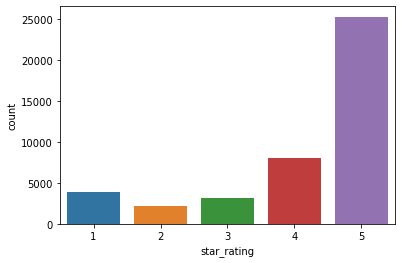

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = sentdf ,x = 'star_rating')
plt.xlabel('star_rating');




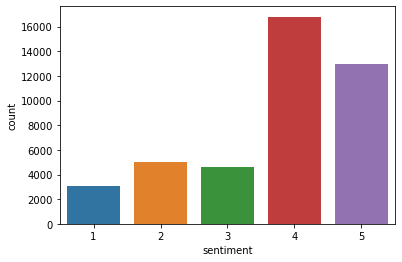

In [100]:
# New

sns.countplot(data = sentdf ,x = 'sentiment')
plt.xlabel('sentiment');

In [106]:
# print(sentdf['star_rating'].corr(sentdf['sentiment']))

sentdf
sentdf['review_body'].iloc[42469]

'Wright summarizes current research on primate evolution from a novel perspective -- he interprets how we *feel* in evolutionary terms -- especially moral feelings such as guilt, righteous anger, etc.  His conclusions are sensible but not profound.  The most important message of the book is simply the &quot;copernican&quot; shift that places evolutionary game theory, rather than our inherited primate emotions, at the center of our moral universe'

In [109]:
import math
y_actual = sentdf['star_rating']
y_predicted = sentdf['sentiment']

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


Root Mean Square Error:

1.1156569229259998


In [113]:
# for each discipline

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

def r2_rmse( g ):
    r2 = r2_score( g['star_rating'], g['sentiment'] )
    rmse = np.sqrt( mean_squared_error( g['star_rating'], g['sentiment'] ) )
    return pd.Series( dict(  r2 = r2, rmse = rmse ) )

sentdf.groupby('discipline').apply( r2_rmse ).reset_index()

,discipline,r2,rmse
0,anthropology,0.274383,1.015928
1,economy,0.311654,1.082664
2,politics,0.177057,1.200858
3,psychology,0.278635,1.001629
4,sociology,0.293318,1.077675


In [114]:
# for each discipline

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

def r2_rmse( g ):
    MSE = np.square(np.subtract(g['star_rating'], g['sentiment'])).mean() 
    rmse = np.sqrt( mean_squared_error( g['star_rating'], g['sentiment'] ) )
    return pd.Series( dict(  MSE = MSE, rmse = rmse ) )

sentdf.groupby('discipline').apply( r2_rmse ).reset_index()

,discipline,MSE,rmse
0,anthropology,1.032110,1.015928
1,economy,1.172162,1.082664
2,politics,1.442060,1.200858
3,psychology,1.003261,1.001629
4,sociology,1.161383,1.077675
